In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [19]:
df = pd.read_csv(r"C:\Users\Asquare jr\Desktop\Healthcare stroke data\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data understanding and cleaning

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Returns a DataFrame of the same shape as df with True for NaNs

In [5]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


### Returns the number of missing values in each column

In [6]:
df.isnull().sum(axis=0)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Returns rows with any missing values

In [18]:
df[df.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


### Returns a Series of booleans, True for duplicated rows

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

### Changing age column data type from float to int

In [38]:
df["age"] = df["age"].astype("int")

### Filling BMI Column that as Nan as a value with the mean value of the column

In [ ]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean()) 
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### Identifying outliers

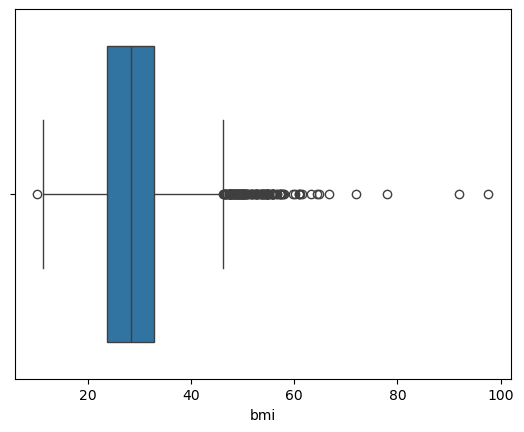

In [47]:
sns.boxplot(x=df["bmi"])
plt.show()

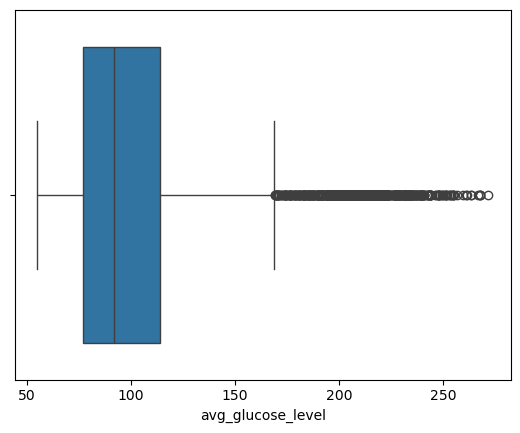

In [48]:
sns.boxplot(x=df["avg_glucose_level"])
plt.show()

# EDAs

### Summary statistics of the datset

In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Analyzing relationships between stroke and:

#### Age:

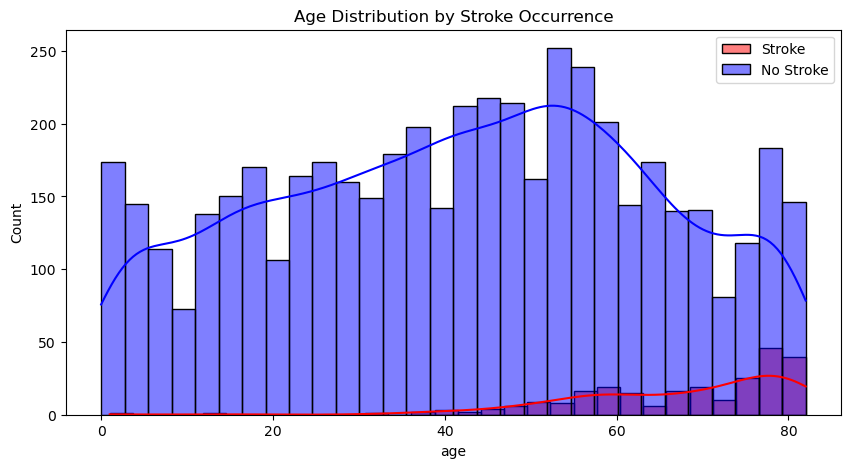

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['stroke'] == 1]['age'], bins=30, kde=True, color='red', label='Stroke')
sns.histplot(df[df['stroke'] == 0]['age'], bins=30, kde=True, color='blue', label='No Stroke')
plt.title('Age Distribution by Stroke Occurrence')
plt.legend()
plt.show()

This shows if stroke cases are more common among older individuals.

#### Hypertension & Heart Disease:

This will show if stroke risk increases significantly for those with these conditions.

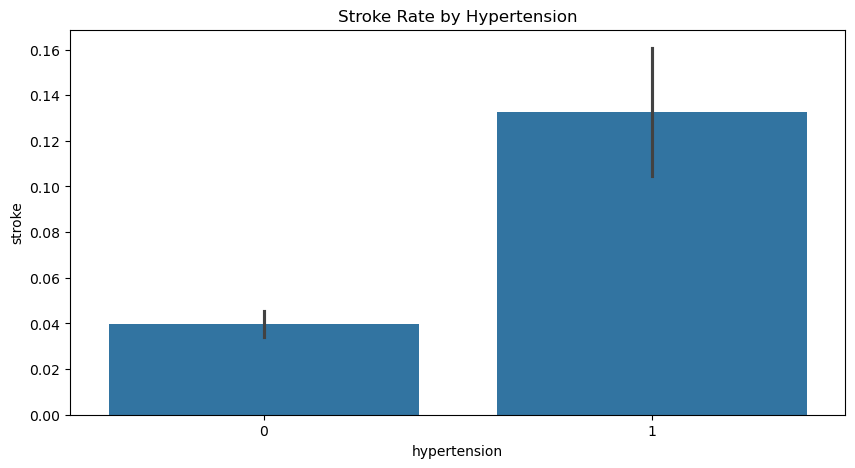

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hypertension', y='stroke', data=df)
plt.title('Stroke Rate by Hypertension')
plt.show()

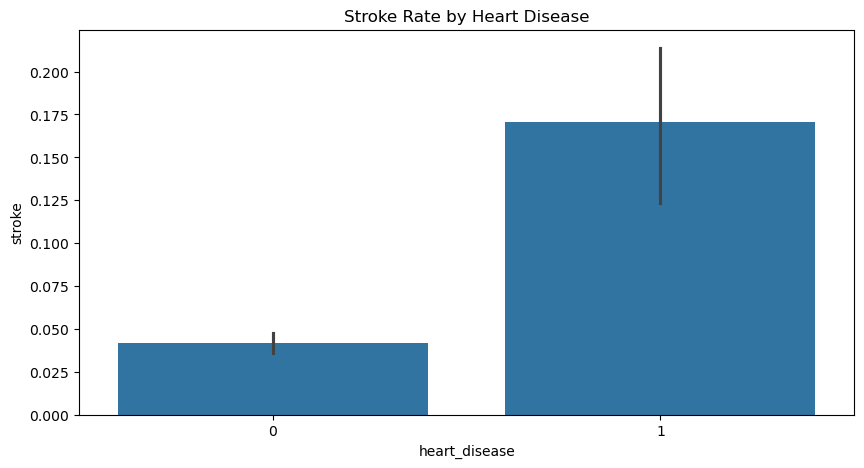

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='heart_disease', y='stroke', data=df)
plt.title('Stroke Rate by Heart Disease')
plt.show()

**Insight:** People with hypertension and heart disease are at a higher risk of stroke.

#### Glucose Levels & BMI vs. Stroke

If stroke patients have higher glucose levels or BMI, it indicates metabolic health plays a role.

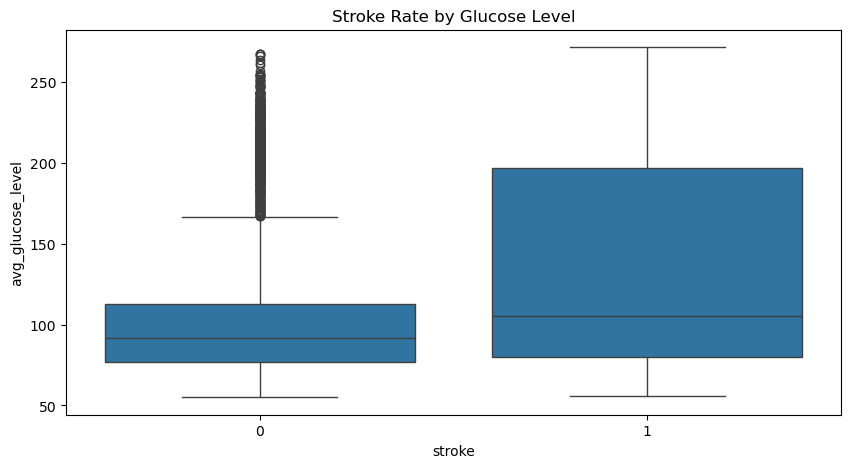

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level Distribution for Stroke vs Non-Stroke')
plt.show()

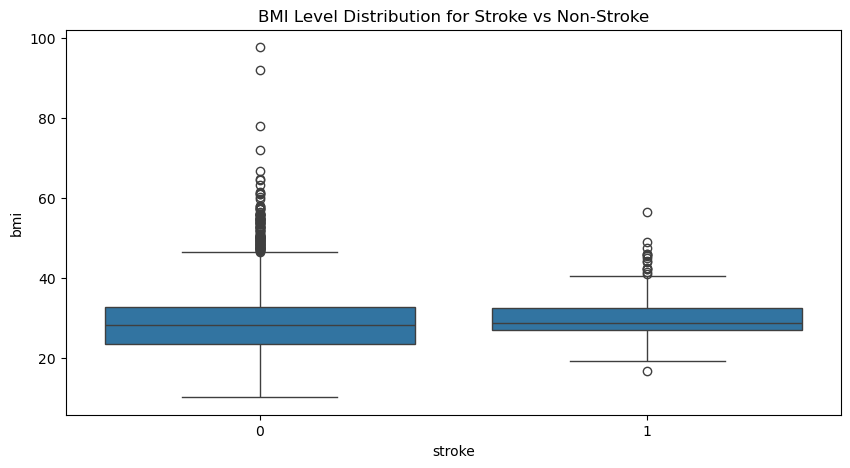

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Level Distribution for Stroke vs Non-Stroke')
plt.show()

**Insight:** Higher glucose levels and BMI may contribute to stroke risk.

####  Smoking Status vs. Stroke

If smoking significantly increases stroke risk, this can be used for prevention awareness.

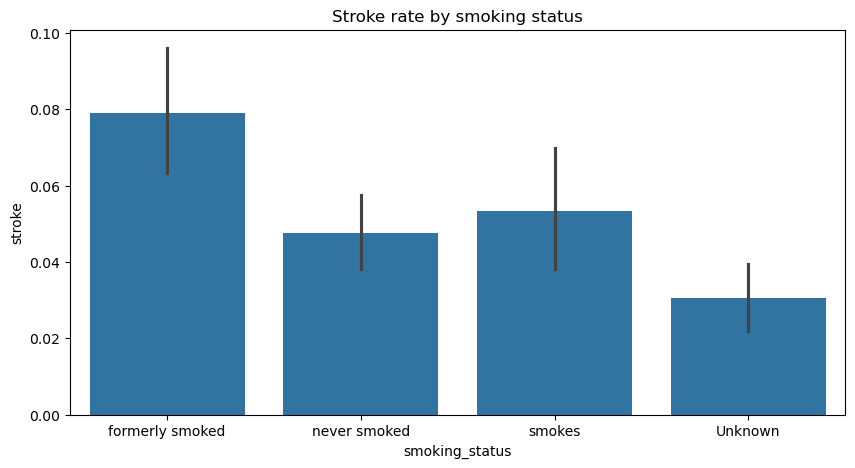

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(x='smoking_status', y='stroke', data=df)
plt.title('Stroke rate by smoking status')
plt.show()

**Insite:** Smoking contributes to stroke risk.

#### Work Type vs. Stroke

Certain work types (e.g., stressful jobs) may be more prone to stroke.

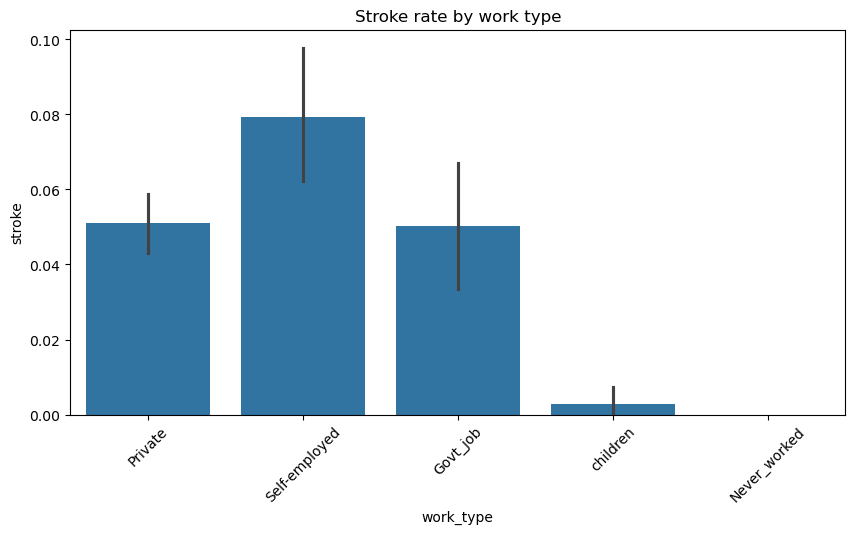

In [59]:
plt.figure(figsize=(10, 5))
sns.barplot(x='work_type', y='stroke', data=df)
plt.xticks(rotation=45)
plt.title('Stroke rate by work type')
plt.show()

#### Residence Type vs. Stroke

This will indicate if urban or rural areas have more stroke cases.

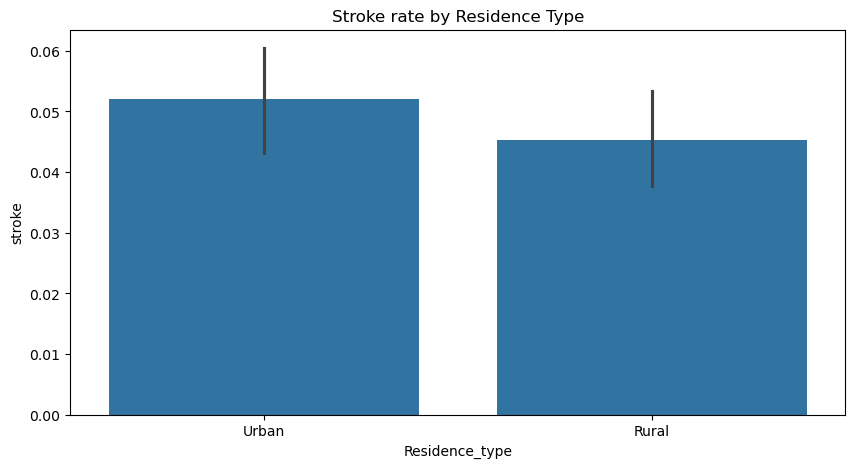

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Residence_type', y='stroke', data=df)
plt.title('Stroke rate by Residence Type')
plt.show()

In [64]:
# Save cleaned dataset 
df.to_csv("C:/Users/Asquare jr/Documents/cleaned_data.csv", index=False)